#                                    **CAPSTONE Project by Group 1060**

# **Table of Contents**
1. Introduction
2. Project Description
3. Problem Statement
4. Problem Analysis (Strategy for the Problem Statement analysis)
5. Sources of Data (Explain about database connection, tables and their columns)
6. Summary of Data Mining (What kind of challenges you faced with the Data and how youresolved them?, Summary of your Analysis)
7. Proposed Solution for Customers (Describe your Analysis in Detail)
8. Conclusion

**Installing My SQL connector package AND PyDrive package**

---





In [0]:
!pip install mysql-connector-python
!pip install -U -q PyDrive
!pip install pandas-profiling --upgrade

     |████████████████████████████████| 14.7MB 253kB/s 
     |████████████████████████████████| 194kB 47.9MB/s 
     |████████████████████████████████| 1.1MB 45.2MB/s 
ERROR: tensorflow-metadata 0.21.1 has requirement protobuf<4,>=3.7, but you'll have protobuf 3.6.1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 614kB 8.0MB/s 
     |████████████████████████████████| 1.5MB 13.4MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 256kB 20.3MB/s 
     |████████████████████████████████| 307kB 21.8MB/s 
     |████████████████████████████████| 215kB 23.4MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 747kB 21.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=a26bc31c94932d8213cf6230e34729414ee3f8069b4a3bee0d99b928c9cacb17
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=17487 sha256=614133f6b5e57535baa3d248

[link text](https://)**Importing all required Package**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

#importing Google Drive packages
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

#importing mysql connector
import mysql.connector as ms

#importing folium related packages
import folium
from folium import plugins 

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

**Mounting Google Drive to Read Event Data .csv file 'event_data.csv'**

In [0]:
drive.mount('/content/drive')
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Connecting Capstone1 database and reading tables**

1.   List item
2.   List item



1.   List item
2.   List item



In [0]:
cnx = ms.connect(host='cpanel.insaid.co',user='student', password='student',database='Capstone1')
cursor = cnx.cursor()

cursor.execute("SHOW TABLES")

tables = cursor.fetchall() ## it returns list of tables present in the database

## showing all the tables one by one
for table in tables:
    print(table)

('events_data',)
('gender_age_train',)
('phone_brand_device_model',)


**Gender Age Table**

In [0]:
sql_select_Query = ("select * from gender_age_train")
cursor.execute(sql_select_Query)
print(cursor)
gender_age_data=cursor.fetchall()
print(gender_age_data[0])

CMySQLCursor: select * from gender_age_train
(-8076087639492063270, 'M', 35, 'M32-38')


In [0]:
#storing geneder age data in dataframe
gender_age_df = pd.DataFrame(gender_age_data)
column_names = [i[0] for i in cursor.description]

gender_age_df.columns = column_names
len(gender_age_df)

74645

In [0]:
gender_age_df.to_csv("gender_age.csv")
gender_age_df.columns

Index(['device_id', 'gender', 'age', 'group'], dtype='object')

In [0]:
gender_age_df.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [0]:
gender_age_df.dtypes

device_id     int64
gender       object
age           int64
group        object
dtype: object

In [0]:
gender_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [0]:
gender_age_df.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [0]:
gender_age_df.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [0]:
gender_age_df.group.value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

In [0]:
gender_age_df.nunique(axis=0) #returns the number of unique values for each variable.

device_id    74645
gender           2
age             85
group           12
dtype: int64

In [0]:
####gender_age_df['group'].value_counts().plot.bar(title='Freq dist of group Type')

In [0]:
####gender_age_df['gender'].value_counts().plot.bar(title='Gender wise device distribution')



**Phone brand device Table**



In [0]:
device_select_Query = ("select * from phone_brand_device_model")
cursor.execute(device_select_Query)
print(cursor)
phone_brand_device=cursor.fetchall()
print(phone_brand_device[0])

CMySQLCursor: select * from phone_brand_device_model
(1877775838486905855, 'vivo', 'Y13')


In [0]:
#storing phone brand data in dataframe
phone_brand_df = pd.DataFrame(phone_brand_device)
column_names = [i[0] for i in cursor.description]

phone_brand_df.columns = column_names
len(phone_brand_df)

87726

In [0]:
phone_brand_df.to_csv("phone_brand.csv")
phone_brand_df.columns

Index(['device_id', 'phone_brand', 'device_model'], dtype='object')

In [0]:
phone_brand_df.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [0]:
phone_brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [0]:
phone_brand_df.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


In [0]:
phone_brand_df.nunique(axis=0) #returns the number of unique values for each variable.

device_id       87726
phone_brand       116
device_model     1467
dtype: int64

In [0]:
phone_brand_df.device_model.unique()

array(['Y13', 'V183', 'R7s', ..., 'Galaxy Tab S T705', 'IVO 8800',
       'U59GT'], dtype=object)

In [0]:
#converting Chinese data in Phoneto English data in Phone Brand column
phone_brand_df.replace(to_replace=['联想 ', 'Huawei','小米','三星' '酷派', '华为','魅族','酷派','奇酷', 'Meizu', '斐讯', '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米',
       'ZUK', '努比亚', '惠普', '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视','LeEco', '海信', '百立丰', '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯',
       '聆韵', 'TCL', '酷珀', '爱派尔', 'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华', '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚',
       '普耐尔', '糖葫芦', '亿通', '欧新', '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q', '台电', '飞利浦', '唯米', '大显', '长虹', '维图',
       '青橙', '本为', '虾米', '夏新', '帷幄', '百加', '三星', '欧奇', '世纪星', '智镁','欧比', '基伍', '飞秒', '德赛', '易派', '谷歌', '金星数码', '广信', '诺亚信', 'MIL',
       '白米', '大可乐', '宝捷讯', '优语', '首云', '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米','凯利通', '唯比', '欧沃', '丰米', '恒宇丰', '奥克斯', '西门子', '欧乐迪'], 
       value=['Lenovo', 'Huawei', 'Xiaomi', 'Samsung' 'Cool', 'Huawei', 'Meizu', 'Cool','Qiku', 'Meizu', 'Fixun', 'China Mobile', 'HTC', 'Tianyu', 'Extreme Treasure', 'LG', 'European', 'Youmi',
       'ZUK', 'Nubia', 'HP', 'Nibiru', 'Meitu', 'Romi', 'Motorola', 'Dream', 'Hammer', 'Focus','LeEco', 'Hisense', 'Bai Li Fung', 'One Plus', 'Language', 'Haier', 'Coolness', 'Newman', 'Flyer', 'Duo Wei',
       'Ling Yun', 'TCL', 'Cool', 'Ipaire', 'LOGO', 'Scallion', 'Fruit', 'ASUS', 'Onda', 'Ayuni','KONKA', 'U-Shop', 'Bangwa', 'Syberyuhua', 'Black Rice', 'Lovme', 'Pioneer', 'E Pie', 'Shenzhou', 'Nokia',
       'Punell', 'Candied Squash', 'Eton', 'Ocean', 'Mickey', 'Cubei Cube', 'Blue Devils', 'Little Poplar', 'Bell Feng', 'Glutinous Rice',
       'Mi Ge', 'E People E Ben', 'Ximi', 'DaQ', 'Taipower', 'Philips', 'Weimi', 'Daxian', 'Changhong', 'Vito','Green Orange', 'Ben Wei', 'Shrimp', 'Xiaxin', 'Village', 'Bega', 'Samsung', 'Occhi', 'Century Star', 'Chi Magnesium',
       'Obi', 'Kivu', 'Femtosecond', 'Desai', 'Yipai', 'Google', 'Venus Digital', 'Guangxin', 'Noahin', 'MIL','White Rice', 'Big Cola', 'Pojet', 'Yuyu', 'Shouyun', 'Rimi', 'Rigao', 'Wopfung', 'Mo Le', 'Fresh Rice' ,
       'Kelly Link', 'Weiby', 'Owo', 'Fengmi', 'Hengyufeng', 'Oaks', 'Siemens', 'Oledi'], inplace=True)

In [0]:
phone_brand_df.device_model.unique()

array(['Y13', 'V183', 'R7s', ..., 'Galaxy Tab S T705', 'IVO 8800',
       'U59GT'], dtype=object)

**Reading Event Data from csv file to Dataframe**

In [0]:
link = 'https://drive.google.com/open?id=1nlZw1xzY3tW8TlKJL18yMCfi3T6Eo9o_' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1nlZw1xzY3tW8TlKJL18yMCfi3T6Eo9o_


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('events_data_file.csv')  

#loading Event dataframe from CSV file
event_data_df = pd.read_csv('events_data_file.csv')


In [0]:
event_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


In [0]:
event_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(4), object(3)
memory usage: 173.7+ MB


In [0]:
event_data_df.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [0]:
#returns the number of unique values for each variable.
event_data_df.nunique(axis=0) 

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60185
city             933
state             32
dtype: int64

In [0]:
sum(pd.isnull(event_data_df['longitude']))

423

In [0]:
#Correcting the null values present in 'longitude' column
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="BhalswaJahangirpur")),"77.247696",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="Delhi")),"77.266049",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="Deoli")),"77.302223",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="DilliCantonment")),"77.217069",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="Gokalpur")),"77.331379",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="NangloiJat")),"77.126448",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="NiDilli")),"77.307839",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="RoshanPura")),"77.08055",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="SultanpurMajra")),"77.10988",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="Tigri")),"77.230918",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="Mumbai")),"72.83738",event_data_df['longitude']) 
event_data_df['longitude'] = np.where(((event_data_df['longitude'].isnull()) & (event_data_df['city'] =="Pune")),"73.859134",event_data_df['longitude']) 

In [0]:
sum(pd.isnull(event_data_df['longitude']))

0

In [0]:
sum(pd.isnull(event_data_df['latitude']))

423

In [0]:
#Correcting the null values present in 'latitude' column
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="BhalswaJahangirpur")),"28.787158",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="Delhi")),"28.712135",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="Deoli")),"28.579339",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="DilliCantonment")),"28.639109",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="Gokalpur")),"28.780808",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="NangloiJat")),"28.726816",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="NiDilli")),"28.631404",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="RoshanPura")),"28.646277",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="SultanpurMajra")),"28.799271",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="Tigri")),"28.559426",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="Mumbai")),"18.981604",event_data_df['latitude']) 
event_data_df['latitude'] = np.where(((event_data_df['latitude'].isnull()) & (event_data_df['city'] =="Pune")),"18.575338",event_data_df['latitude']) 


In [0]:
sum(pd.isnull(event_data_df['latitude']))

0

In [0]:
sum(pd.isnull(event_data_df['state']))

377

In [0]:
event_data_df.state.unique()

array(['Delhi', nan, 'Maharashtra', 'TamilNadu', 'Chandigarh', 'Tripura',
       'Manipur', 'ArunachalPradesh', 'AndhraPradesh', 'Pondicherry',
       'HimachalPradesh', 'Mizoram', 'AndamanandNicobarIslands',
       'Meghalaya', 'MadhyaPradesh', 'Goa', 'Uttaranchal',
       'JammuandKashmir', 'Chhattisgarh', 'Nagaland', 'Telangana',
       'Rajasthan', 'UttarPradesh', 'Orissa', 'Haryana', 'Jharkhand',
       'Assam', 'WestBengal', 'Karnataka', 'Bihar', 'Gujarat', 'Kerala',
       'Punjab'], dtype=object)

In [0]:
event_data_df.city.unique()

array(['Delhi', 'RoshanPura', 'DilliCantonment', 'BhalswaJahangirpur',
       'Tigri', 'Deoli', 'SultanpurMajra', 'NangloiJat', 'NiDilli',
       'Gokalpur', 'Mumbai', 'Pune', 'Diglur', 'Pusad', 'Wardha',
       'Palghar', 'Bhadravati', 'Shrirampur', 'Ulhasnagar', 'Khopoli',
       'Badlapur', 'Chiplun', 'Karanja', 'Buldana', 'Aurangabad', 'Warud',
       'Sholapur', 'Anjangaon', 'Ballarpur', 'Akot', 'NaviMumbai',
       'Navghar', 'Nagpur', 'Parbhani', 'Dhule', 'Dahanu', 'Pimpri',
       'Jalgaon', 'Achalpur', 'Ratnagiri', 'Nashik', 'Latur', 'Kolhapur',
       'Malegaon', 'Bhandara', 'Washim', 'Nanded', 'Amravati', 'Akola',
       'Bhusawal', 'MiraBhayandar', 'Ahmadnagar', 'Chikhli', 'Ambajogai',
       'Amalner', 'Thana', 'Nalasopara', 'Hingoli', 'Khadki', 'Gondiya',
       'Barsi', 'Chalisgaon', 'Shirpur', 'Basmat', 'Chopda',
       'SangliMiraj', 'Satara', 'Wani', 'Nandurbar', 'UranIslampur',
       'Bhiwandi', 'Kamthi', 'Deolali', 'Shegaon', 'Pandharpur',
       'Khamgaon', 'Lonav

In [0]:
#Correcting the null values present in 'state' column
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="BhalswaJahangirpur")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="Delhi")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="Deoli")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="DilliCantonment")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="Gokalpur")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="NangloiJat")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="NiDilli")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="RoshanPura")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="SultanpurMajra")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="Tigri")),"Delhi",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="Mumbai")),"Maharashtra",event_data_df['state']) 
event_data_df['state'] = np.where(((event_data_df['state'].isnull()) & (event_data_df['city'] =="Pune")),"Maharashtra",event_data_df['state']) 

In [0]:
sum(pd.isnull(event_data_df['state']))

250

In [0]:
sum(pd.isnull(event_data_df['city']))

0

In [0]:
sum(pd.isnull(event_data_df['device_id']))

453

**Now we targeting to particualr state data where we need to figure it out**

In [0]:
#Creating New Data frame for particualr state for which we need to gather info
options = ['AndhraPradesh', 'Pondicherry', 'Mizoram', 'AndamanandNicobarIslands', 'Meghalaya', 'HimachalPradesh'] 
  
# selecting rows based on condition 
#new_event_data_df is only target particualr 6 state that are present in options
new_event_data_df = event_data_df[event_data_df['state'].isin(options)] 

In [0]:
new_event_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
1868677,5985.0,-7.971778e+18,2016-05-07 07:54:51,83.368899,17.798818,Visakhapatnam,AndhraPradesh
1868678,56595.0,-7.971778e+18,2016-05-02 20:47:57,83.368899,17.798818,Visakhapatnam,AndhraPradesh
1868679,75863.0,-7.971778e+18,2016-05-07 08:02:09,83.368899,17.798818,Visakhapatnam,AndhraPradesh
1868680,81849.0,-7.971778e+18,2016-05-05 06:05:14,83.368899,17.798818,Visakhapatnam,AndhraPradesh
1868681,97846.0,-7.971778e+18,2016-05-06 12:19:21,83.368899,17.798818,Visakhapatnam,AndhraPradesh


In [0]:
new_event_data_df.nunique(axis=0) #returns the number of unique values for each variable.

event_id     329125
device_id      5223
timestamp    240657
longitude      5204
latitude       5211
city            113
state             6
dtype: int64

In [0]:
# Group By state
df_size_by_state = new_event_data_df.groupby(['state']).size().reset_index()
df_size_by_state.columns.values[1] = 'Count'  # renaming the size column
print(df_size_by_state)

                      state   Count
0  AndamanandNicobarIslands    1515
1             AndhraPradesh  321332
2           HimachalPradesh    1409
3                 Meghalaya    1515
4                   Mizoram    1613
5               Pondicherry    1741


In [0]:
new_event_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329125 entries, 1868677 to 2197848
Data columns (total 7 columns):
event_id     329125 non-null float64
device_id    329056 non-null float64
timestamp    329125 non-null object
longitude    329125 non-null object
latitude     329125 non-null object
city         329125 non-null object
state        329125 non-null object
dtypes: float64(2), object(5)
memory usage: 20.1+ MB


In [0]:
new_event_data_df.device_id.unique()

array([-7.97177847e+18, -2.45720187e+18, -1.35449895e+18, ...,
       -2.42700765e+18,  1.59138181e+18,  9.71676291e+17])

In [0]:
sum(pd.isnull(new_event_data_df['longitude'])) 

0

In [0]:
sum(pd.isnull(new_event_data_df['latitude']))

0

In [0]:
sum(pd.isnull(new_event_data_df['state'])) # Now null count reduce from 250 to 0 so we can say that we managed to eliminate null values in state column since we already targeted particualr states

0

In [0]:
sum(pd.isnull(new_event_data_df['device_id'])) # Now we 've fond only 69 device id have null values which is earlier 453

69

In [0]:
#dropping records with devide_id = NULL
new_event_data_df.dropna(subset=['device_id'], inplace=True)

In [0]:
sum(pd.isnull(new_event_data_df['device_id']))

0

In [0]:
# Convert device _id from float to int64
new_event_data_df['device_id']=new_event_data_df['device_id'].astype(np.int64)

In [0]:
# Group By Device ID
df_size_by_devID = new_event_data_df.groupby(['device_id']).size().reset_index()
df_size_by_devID.columns.values[1] = 'Count'  # renaming the size column
print(df_size_by_devID)

                device_id  Count
0    -9222173362545970176     20
1    -9215269475645635584     53
2    -9213181390285349888      2
3    -9211311018136103936     89
4    -9206855930900386816    156
...                   ...    ...
5218  9216831296958913536     44
5219  9217996670111389696      2
5220  9219479903879164928      2
5221  9219926280825641984     40
5222  9220807070557263872     27

[5223 rows x 2 columns]


In [0]:
#Performing Pandas profiling on event data frame with specific states data
profile_new_event_data_df = pandas_profiling.ProfileReport(new_event_data_df)
profile_new_event_data_df.to_file(outputfile="Capstone1_Event_data_specific_States_preprocessing.html")

**Merging Gender & Phone data frame**

In [0]:
phone_gender_combined = pd.merge(gender_age_df, phone_brand_df)
phone_gender_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74617 entries, 0 to 74616
Data columns (total 6 columns):
device_id       74617 non-null int64
gender          74617 non-null object
age             74617 non-null int64
group           74617 non-null object
phone_brand     74617 non-null object
device_model    74617 non-null object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


In [0]:
phone_gender_combined.head()

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2
3,-4938849341048082022,M,30,M29-31,Samsung,Galaxy S4
4,245133531816851882,M,30,M29-31,SUGAR,时尚手机


In [0]:
sum(pd.isnull(phone_gender_combined['device_id']))

0

In [0]:
phone_gender_combined.nunique(axis=0) #returns the number of unique values for each variable

device_id       74617
gender              2
age                85
group              12
phone_brand       110
device_model     1427
dtype: int64

In [0]:
#Performing Pandas profiling on phone_gender combined dataframe
profile_combined_phone_gender_df = pandas_profiling.ProfileReport(phone_gender_combined)
profile_combined_phone_gender_df.to_file(outputfile="Capstone1_Phone_Gender_combined_preprocessing.html")

**Now we are trying to merge New dataframe with phone & age brand with condtion**

In [0]:
dfnew_total = pd.merge(phone_gender_combined, new_event_data_df, on='device_id', how='right') #Right Join on device_id ( phone & gender on left & event data frame on right)
dfnew_total.info()
dfnew_total.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 329056 entries, 0 to 329055
Data columns (total 12 columns):
device_id       329056 non-null int64
gender          669 non-null object
age             669 non-null float64
group           669 non-null object
phone_brand     669 non-null object
device_model    669 non-null object
event_id        329056 non-null float64
timestamp       329056 non-null object
longitude       329056 non-null object
latitude        329056 non-null object
city            329056 non-null object
state           329056 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 32.6+ MB


,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state
0,-6552729385743211,M,28.0,M27-28,vivo,X3T,189757.0,2016-05-07 21:40:38,78.487472,17.338946999999994,Rajendranagar,AndhraPradesh
1,-6552729385743211,M,28.0,M27-28,vivo,X3T,190875.0,2016-05-04 22:31:06,78.487472,17.338946999999994,Rajendranagar,AndhraPradesh
2,-6552729385743211,M,28.0,M27-28,vivo,X3T,236452.0,2016-05-04 21:45:10,78.487472,17.338946999999994,Rajendranagar,AndhraPradesh
3,-6552729385743211,M,28.0,M27-28,vivo,X3T,237777.0,2016-05-04 22:33:57,78.487472,17.338946999999994,Rajendranagar,AndhraPradesh
4,-6552729385743211,M,28.0,M27-28,vivo,X3T,289077.0,2016-05-04 21:14:14,78.487472,17.338946999999994,Rajendranagar,AndhraPradesh


In [0]:
#Phone brand null count in new dataframe
sum(pd.isnull(dfnew_total['phone_brand']))

328387

In [0]:
dfnew_total.nunique(axis=0)#returns the number of unique values for each variable.

device_id         5223
gender               2
age                 16
group               11
phone_brand          7
device_model        27
event_id        329056
timestamp       240626
longitude         5204
latitude          5211
city               113
state                6
dtype: int64

**dfnew dataframe Profiling**

In [0]:
profile = pandas_profiling.ProfileReport(dfnew_total)
profile.to_file(outputfile="Dfnew_total_preprocessing.html")

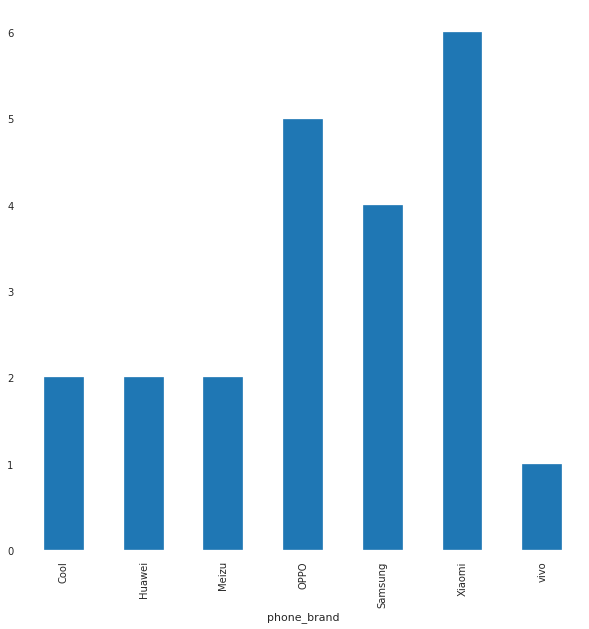

In [0]:
dfnew_total.groupby('phone_brand')['group'].nunique().plot(kind='bar',figsize = (10, 10))
plt.show()

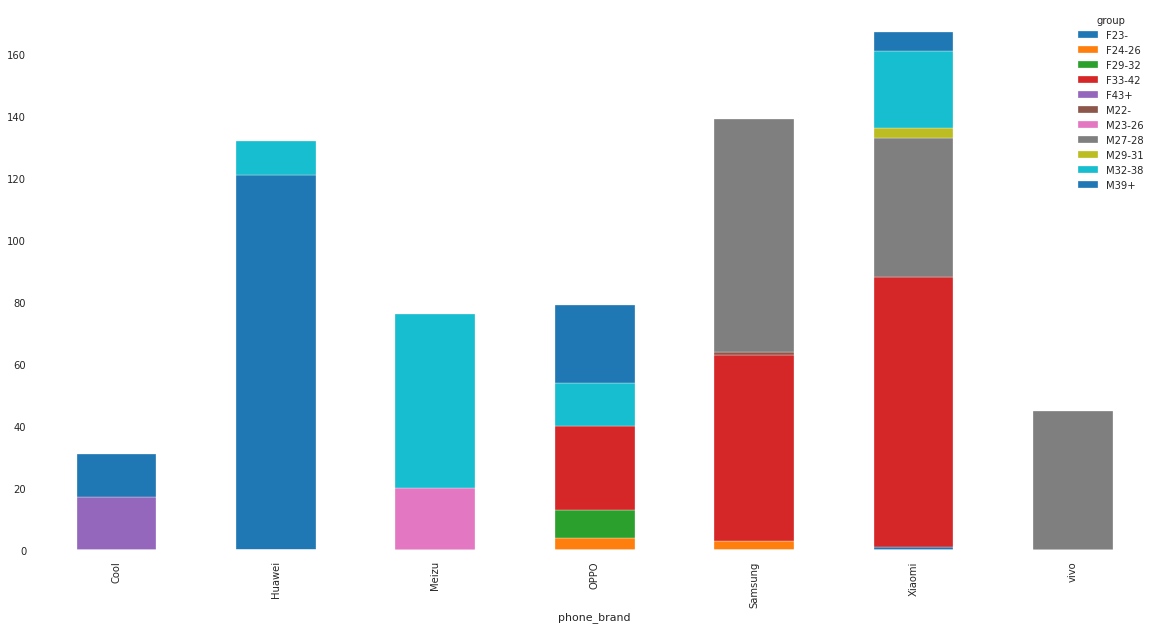

In [0]:
dfnew_total.groupby(['phone_brand','group']).size().unstack().plot(kind='bar',stacked=True,figsize = (20, 10),legend='true')
plt.show()

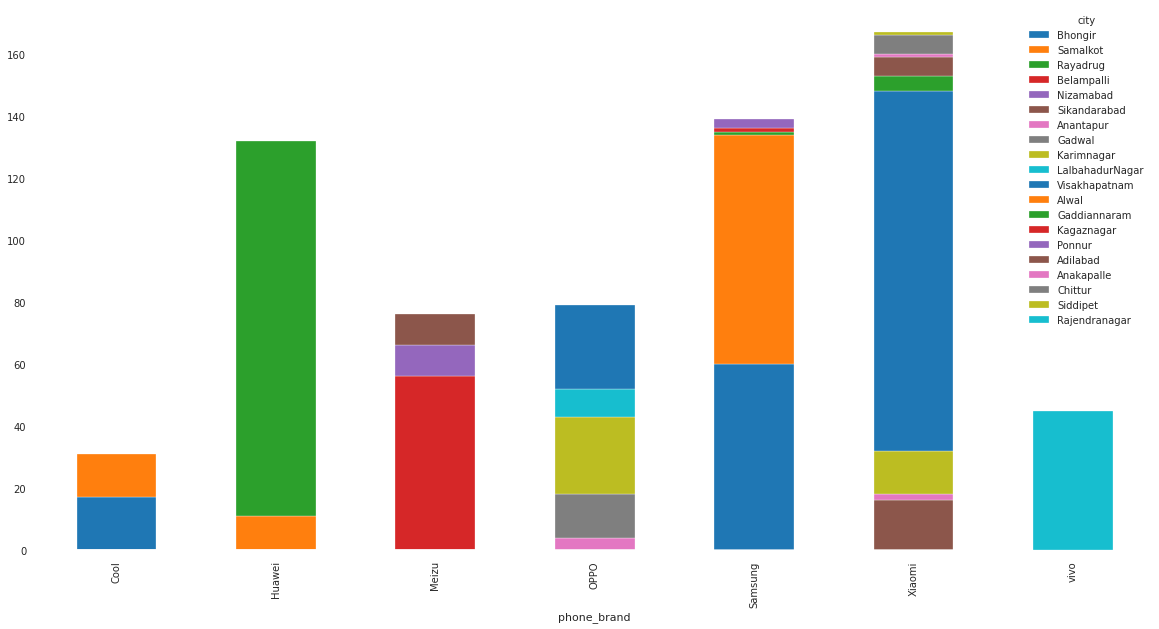

In [0]:
dfnew_total.groupby(['phone_brand','city']).size().unstack().plot(kind='bar',stacked=True,figsize = (20, 10),legend='true')
plt.show()

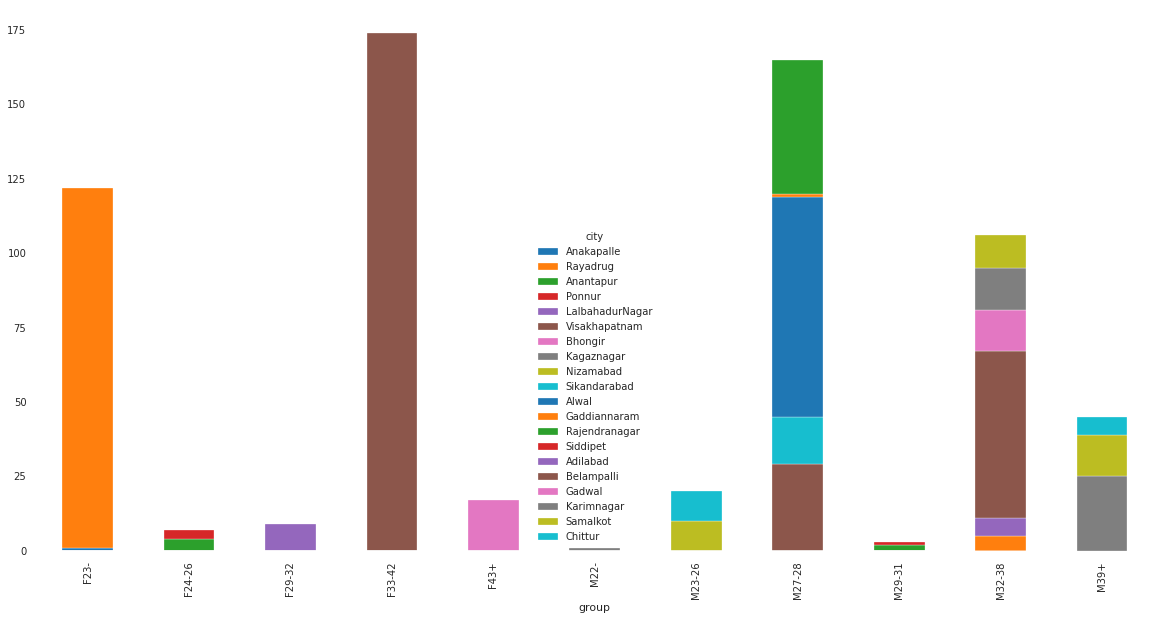

In [0]:
dfnew_total.groupby(['group','city']).size().unstack().plot(kind='bar',stacked=True,figsize = (20, 10),legend='true')
plt.show()

In [0]:
space = np.ones(21)/20
dfnew_total.groupby['phone_brand'].value_counts().plot(kind='pie',fontsize=14, explode=space, startangle=160, figsize=(11,11), legend=True ,autopct='%3.1f%%',
                                         wedgeprops=dict(width=0.15))

Text(0.5, 1.0, 'Statewise distribution of device_ids')

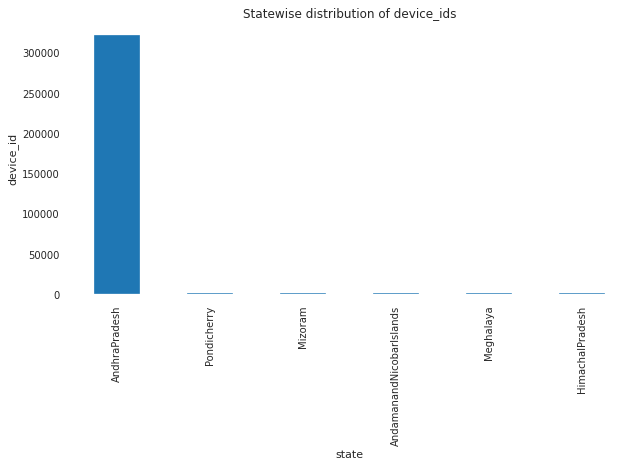

In [0]:
dfnew_total['state'].value_counts().plot.bar(figsize=(10,5))
plt.xlabel('state')
plt.ylabel('device_id')
plt.title('Statewise distribution of device_ids')

In [0]:
dfnew_total.to_csv("final_data.csv")
dfnew_total.columns

Index(['device_id', 'gender', 'age', 'group', 'phone_brand', 'device_model',
       'event_id', 'timestamp', 'longitude', 'latitude', 'city', 'state'],
      dtype='object')

**Map realted code** 

In [0]:
 
latitude = 37.0902
longitude = -95.7129

#m = folium.Map([17.338947, 78.487472], zoom_start=5,width=500,height=500)
traffic_map = folium.Map(location=[latitude, longitude], zoom_start=5)
#stationArr = dfnew[['latitude', 'longitude']].as_matrix()

# plot heatmap
#m.add_children(plugins.HeatMap(stationArr, radius=15))
#traffic_map

In [0]:
locations = dfnew_total[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

['17.338946999999994', '78.487472']

In [0]:
len(locationlist)

329056

In [0]:
import sys
sys.setrecursionlimit(329056)

In [0]:
sys.getrecursionlimit()

329056

In [0]:
map = folium.Map(location=[17.338946999999994, 78.487472], zoom_start=12)
for point in range(0, 1000):
    folium.Marker(locationlist[point], popup=dfnew_total['event_id'][point]).add_to(map)
map